# Objective

- `Optical images produced by a scintillator emit photons when exposed to X-rays`
- `Rapid motion of the object being imaged causes the captured images to suffer from blur`
- `The blur effect reduces the clarity and accuracy of the images`
- `This makes it difficult to extract precise information about the object's location and features`
- `Advanced image deblurring techniques are needed to restore image sharpness and accurate localization of the object`
- `The image captured is spherical with 10mm diameter`

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

- `Image preprocessing is applied on ImageJ software`
- `Loading Cropped image`

In [2]:
img = cv.imread(r"F:\Work\Xray_Data\Blur\Result_6_30fps\163128357_0217_1.tif")

In [3]:
img.shape

(86, 42, 3)

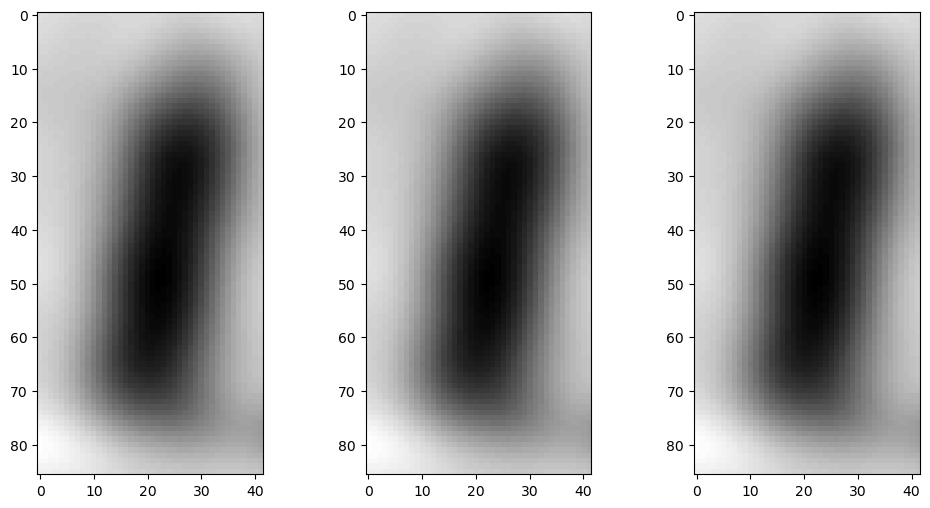

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img[:,:,1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img[:,:,2], cmap='gray')

`To reduce the dimensionality, convert 3 channels to single channel as all the channels contain similar information`

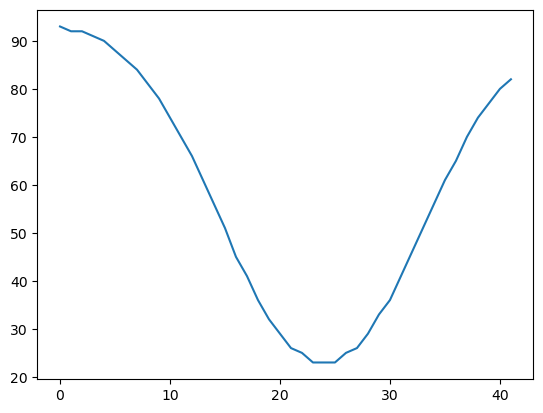

In [72]:
plt.plot(img[40,:,0])

`Clear dip indicates the gradient of the object of interest`

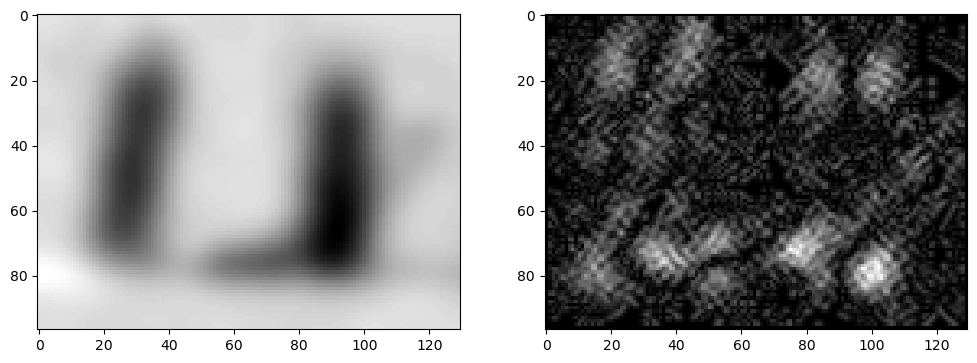

In [38]:
sobelx = cv.Sobel(src=img[:,:,0], ddepth=cv.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cv.convertScaleAbs(sobelx), cmap='gray')

`Sobel edge detection doesn't the capture any features`

In [51]:
def sidebyside(original, converted):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(converted)

`To study more precisely, Single object is cropped and rotated by 15 degrees`

array([48, 48, 48, 45, 40, 36, 35, 33, 31, 29, 28, 27, 25, 25, 24, 23, 23,
       22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 21, 21, 21, 22, 20, 21, 22,
       20, 20, 21, 24, 29, 34, 43, 48, 48, 48, 48], dtype=int64)

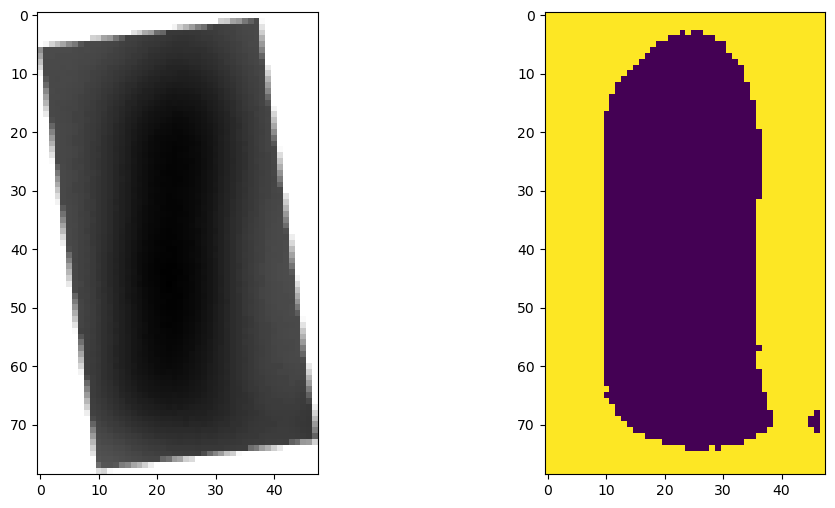

In [93]:
testimg = cv.imread(r"F:\Work\Xray_Data\Blur\Result_6_30fps\rotated1.png")
img = testimg
res, thres = cv.threshold(img[:,:,0], 70, 255, cv.THRESH_BINARY)
sidebyside(img[:,:,0], thres)
np.count_nonzero(thres, axis=1)

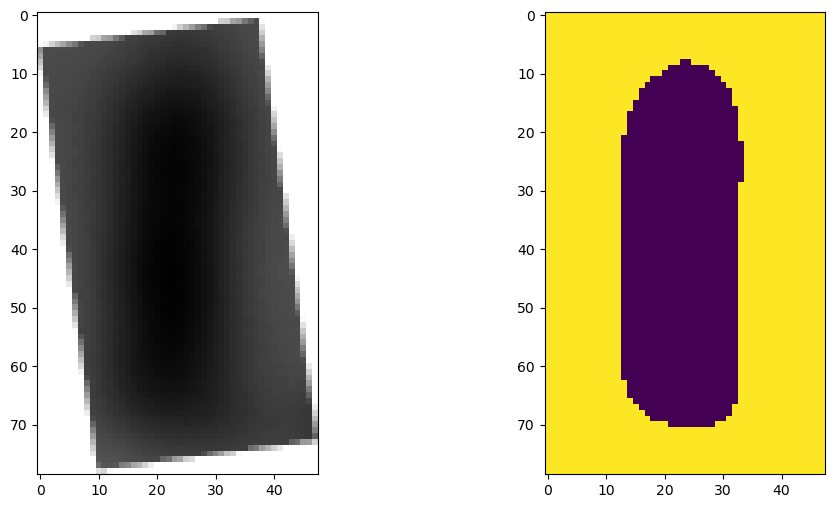

In [102]:
res, thres = cv.threshold(img[:,:,0], 55, 255, cv.THRESH_BINARY)
sidebyside(img[:,:,0], thres)

`Threshold of 75 includes much noisy components but 55 doesn't`

array([48, 48, 48, 48, 48, 48, 48, 48, 46, 41, 39, 36, 34, 32, 32, 31, 30,
       29, 29, 29, 29, 28, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 32,
       33, 35, 40, 48, 48, 48, 48, 48, 48, 48, 48], dtype=int64)

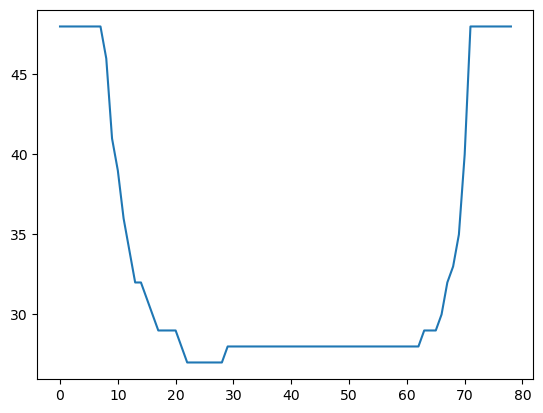

In [104]:
plt.plot(np.count_nonzero(thres, axis=1))
np.count_nonzero(thres, axis=1)

Analysing row wise 

In [91]:
np.count_nonzero(thres, axis=1)

array([48, 48, 48, 48, 48, 48, 48, 48, 46, 41, 39, 36, 34, 32, 32, 31, 30,
       29, 29, 29, 29, 28, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 32,
       33, 35, 40, 48, 48, 48, 48, 48, 48, 48, 48], dtype=int64)

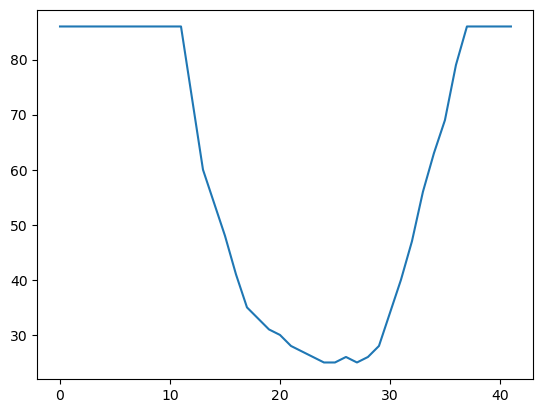

In [85]:
plt.plot(np.count_nonzero(thres, axis=0))

In [94]:
np.count_nonzero(thres, axis=0)

array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 31, 26, 22, 20, 18, 16, 15,
       13, 12, 11, 10,  9,  9,  8,  8,  7,  7,  8,  9,  9, 10, 12, 13, 14,
       18, 21, 55, 72, 76, 79, 79, 79, 79, 79, 79, 77, 75, 79],
      dtype=int64)

(array([[ 0.,  0.,  0., ...,  0., 76., 21.],
        [ 0.,  0.,  0., ...,  0., 76., 21.],
        [ 0.,  0.,  0., ...,  0., 76., 21.],
        ...,
        [ 0.,  0.,  0., ..., 29., 68.,  0.],
        [ 0.,  0.,  0., ..., 29., 68.,  0.],
        [ 0.,  0.,  0., ..., 21., 76.,  0.]]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <a list of 130 BarContainer objects>)

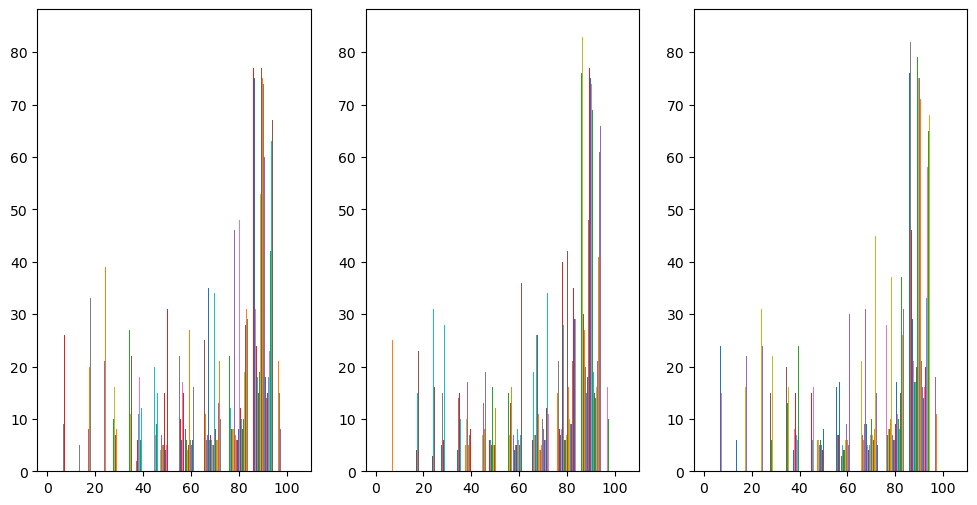

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.hist(img[:,:,0])
plt.subplot(1,3,2)
plt.hist(img[:,:,1])
plt.subplot(1,3,3)
plt.hist(img[:,:,2])


# Blind Deblurring

In [7]:
kernel = np.zeros((11,11))
kernel[:, 5] = 1
print(kernel)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
from skimage import color, data, restoration

In [19]:
deconvolved = restoration.richardson_lucy(img[:,:,0], kernel*255, 10, False)

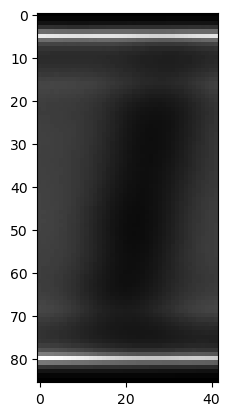

In [20]:
plt.imshow(deconvolved, cmap='gray')